In [1]:
#Get Data
import pandas
data = pandas.read_csv('data/AirlinesCluster.csv')
data

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [2]:
#Describe the data
data.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [4]:
# Machine Learning
matrix = data.values
X = matrix[:,4:7]

/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

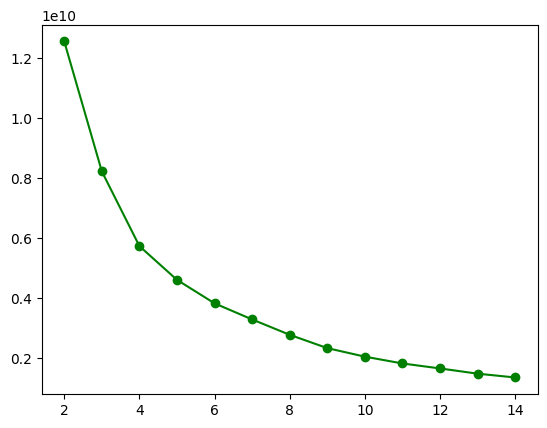

In [5]:
from sklearn.cluster import KMeans
inertias = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2,15),inertias,'o-g')
plt.show()

In [6]:
model=KMeans(n_clusters=12,random_state=42)
model.fit(X)

/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=12, random_state=42)

In [7]:
centronoids = model.cluster_centers_
centronoids

array([[9.51459075e+01, 3.77224199e-01, 1.15757295e+03],
       [2.26783333e+03, 7.56250000e+00, 7.07675000e+03],
       [1.48192362e+02, 5.44554455e-01, 4.72055446e+03],
       [1.08346818e+04, 2.32727273e+01, 3.31677273e+03],
       [3.51914130e+03, 9.30434783e+00, 2.14703261e+03],
       [1.25548137e+02, 4.93788820e-01, 3.49609161e+03],
       [1.37848718e+02, 5.02564103e-01, 7.54148718e+03],
       [6.48258333e+03, 1.69166667e+01, 6.23536111e+03],
       [2.64585000e+04, 4.90000000e+01, 2.60200000e+03],
       [1.55194570e+02, 5.97285068e-01, 2.26949774e+03],
       [2.45487611e+03, 7.11504425e+00, 4.67368142e+03],
       [1.49529762e+02, 5.66964286e-01, 6.06714881e+03]])

In [8]:
clusters = pandas.DataFrame(centronoids,columns=['Flight_miles_12months','Flight_trans_12months','Days_since_enroll'])
clusters

,Flight_miles_12months,Flight_trans_12months,Days_since_enroll
0,95.145907,0.377224,1157.572954
1,2267.833333,7.562500,7076.750000
2,148.192362,0.544554,4720.554455
3,10834.681818,23.272727,3316.772727
4,3519.141304,9.304348,2147.032609
5,125.548137,0.493789,3496.091615
6,137.848718,0.502564,7541.487179
7,6482.583333,16.916667,6235.361111
8,26458.500000,49.000000,2602.000000
9,155.194570,0.597285,2269.497738


In [9]:
data['Cluster_group'] = model.labels_
data

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,Cluster_group
0,28143,0,174,1,0,0,7000,6
1,19244,0,215,2,0,0,6968,6
2,41354,0,4123,4,0,0,7034,6
3,14776,0,500,1,0,0,6952,6
4,97752,0,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,0
3995,64385,0,981,5,0,0,1395,0
3996,73597,0,25447,8,0,0,1402,0
3997,54899,0,500,1,500,1,1401,0


In [10]:
cluster6 = data[data['Cluster_group']==6]
cluster6.shape
cluster6.to_csv('low_miles_low_trans_many_days.csv')